<a href="https://colab.research.google.com/github/Hemasrikallam/Task1/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')

# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Display basic information about the dataset
print("\nDataset Info:")
display(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [5]:
# Display the number of null values per column
print("\nNull values per column:")
display(df.isnull().sum())



Null values per column:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

# For Cabin, impute as "Unknown"
df['Cabin'].fillna('Unknown', inplace=True)

# For Embarked, fill missing with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Verify no missing values remain
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


/tmp/ipython-input-3027533613.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-3027533613.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [7]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Encode 'Embarked' using one-hot encoding
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Simplify Cabin by taking only the first letter (deck info)
df['Cabin'] = df['Cabin'].apply(lambda x: x[0] if x != 'Unknown' else 'U')
df = pd.get_dummies(df, columns=['Cabin'], drop_first=True)

# Drop columns not useful for modeling (Name, Ticket, PassengerId)
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_features = ['Age', 'Fare', 'SibSp', 'Parch']
df[num_features] = scaler.fit_transform(df[num_features])

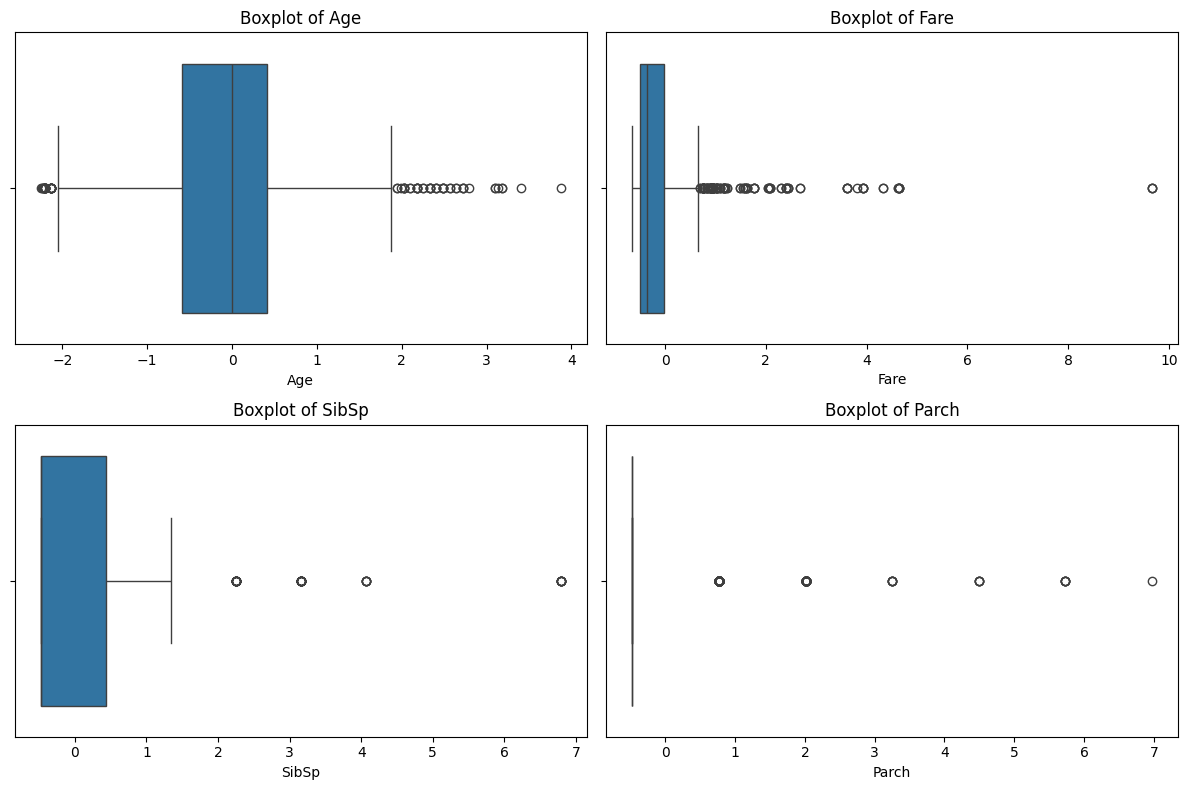

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# --- 1. Visualize outliers ---
num_features = ['Age', 'Fare', 'SibSp', 'Parch']
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [10]:
# --- 2. Remove outliers using IQR method ---
def remove_outliers_iqr(data, cols):
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

df = remove_outliers_iqr(df, num_features)

# --- 3. Standardize numerical features after outlier removal ---
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

print("Shape after outlier removal:", df.shape)
print(df.head())

Shape after outlier removal: (577, 17)
   Survived  Pclass  Sex       Age     SibSp         Parch      Fare  \
0         0       3    0 -0.909802  1.800735  1.110223e-16 -0.609448   
2         1       3    1 -0.439745 -0.448235  1.110223e-16 -0.555858   
3         1       1    1  0.617882  1.800735  1.110223e-16  3.030715   
4         0       3    0  0.617882 -0.448235  1.110223e-16 -0.545934   
5         0       3    0 -0.005046 -0.448235  1.110223e-16 -0.513517   

   Embarked_Q  Embarked_S  Cabin_B  Cabin_C  Cabin_D  Cabin_E  Cabin_F  \
0       False        True    False    False    False    False    False   
2       False        True    False    False    False    False    False   
3       False        True    False     True    False    False    False   
4       False        True    False    False    False    False    False   
5        True       False    False    False    False    False    False   

   Cabin_G  Cabin_T  Cabin_U  
0    False    False     True  
2    False    False  

In [11]:
# Save the transformed dataframe to a CSV file
df.to_csv('transformed_titanic_data.csv', index=False)
print("Transformed data saved to 'transformed_titanic_data.csv'")

Transformed data saved to 'transformed_titanic_data.csv'
